<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a00351269/blob/Modulo5_Data_Analysis_Python/Modulo5_Data_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 5 Curso: Data Analysis with Python IBM por
<left>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%201/images/IDSNlogo.png" width="128" alt="cognitiveclass.ai logo"  />
</center>

###Genaro Ramos Higuera

###Matrícula A00351269

### Progreso del Módulo 5 Concluído Exitosamente
### Evidencias

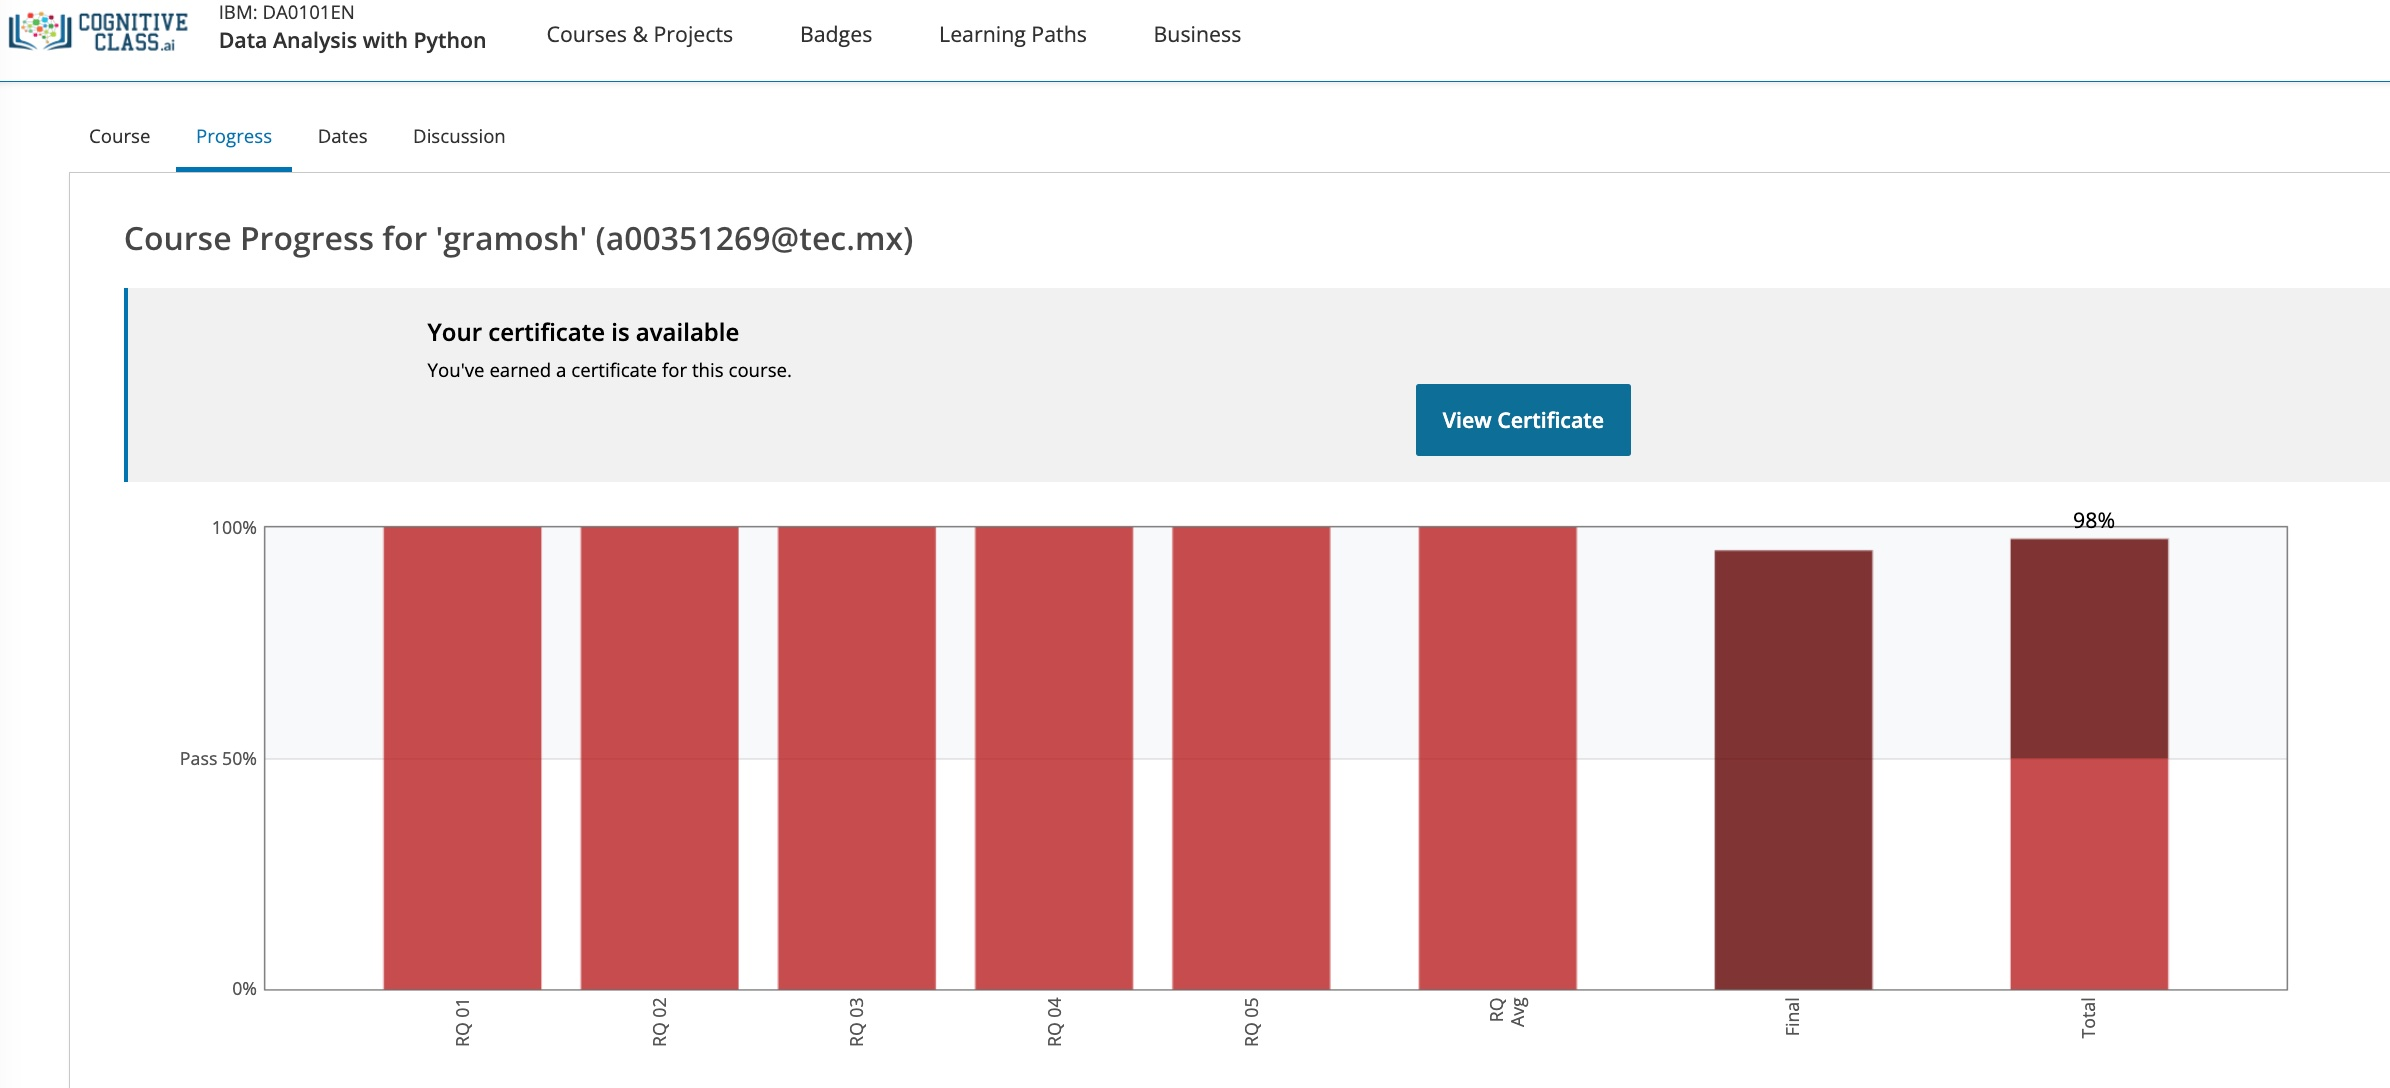

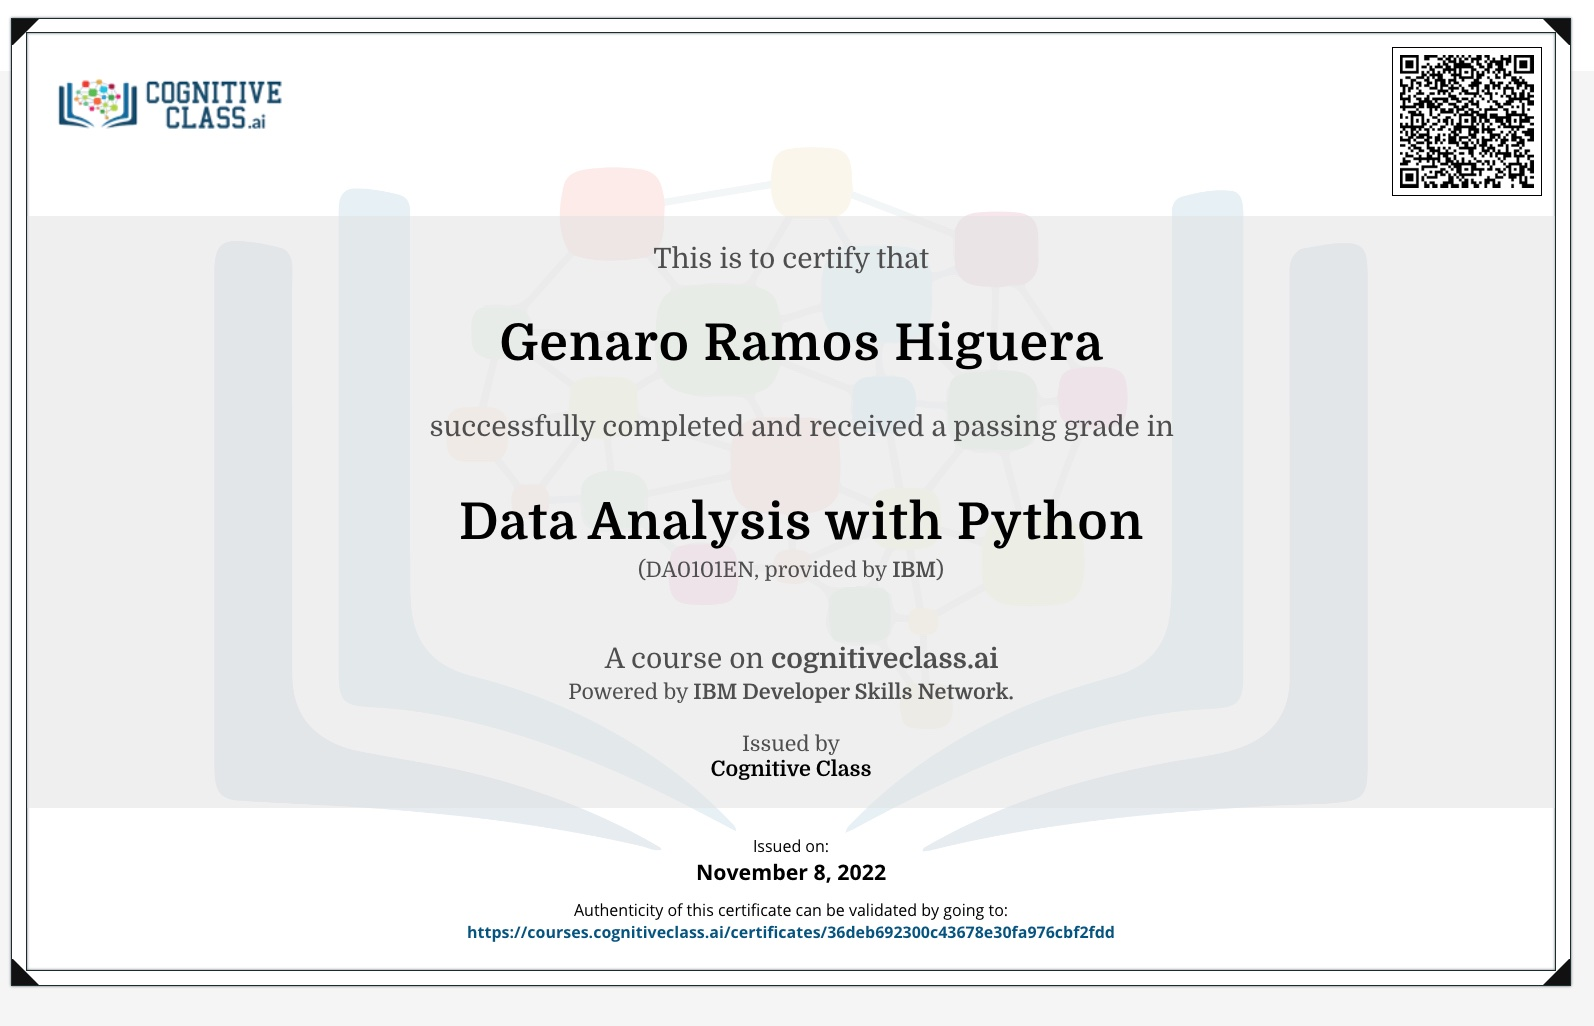

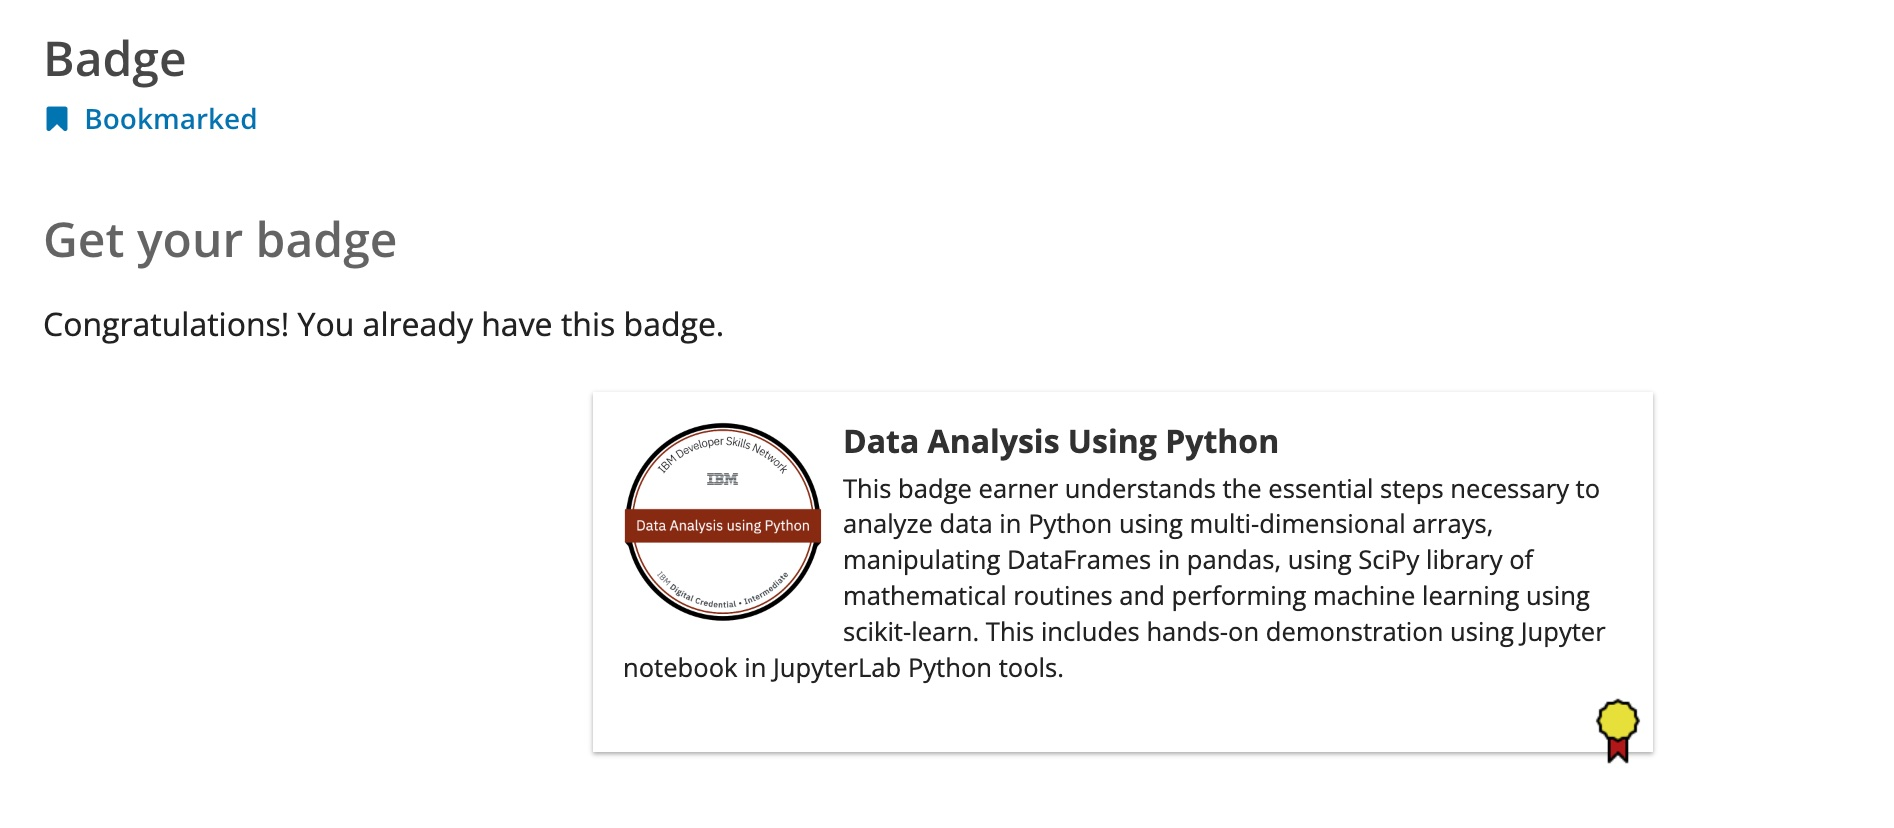

In [1]:
import pandas as pd
import numpy as np


In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

Cargamos a un dataframe el archivo:

In [4]:

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Nos quedamos con las numericas

In [5]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Librerias para plotting:

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

Funcion para plotear las ditribuciones

In [43]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
  
    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

##Parte 1: Training y Testing


Asignamos variable de salida o target y, y las variables independientes x como sigue:

In [9]:
y_data = df['price']

In [10]:
x_data=df.drop('price',axis=1)

Hacemos la particion

In [13]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


###QUESTION:
###Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Ahora usemos el modelo de regresion lineal:

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
lre=LinearRegression()
lre

LinearRegression()

Entrenamos el modelo con la variable horsepower:

In [18]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Ahora sacamos su r2 score con los datos de test y veremos que es muy bajo:

In [19]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

Comparado con los datos de training:


In [20]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

###Question:  Find the R^2 on the test data using 40% of the dataset for testing.

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

En ocasiones no se tienen suficientes datos de prueba (test); como resultado es mejor realizar un cross-validation (validacion cruzada).



In [22]:
from sklearn.model_selection import cross_val_score

VEamos ahora con la feature ("horsepower"),y el target data (y_data). 
El parametro 'cv' determina el numero de folds. En este caso es 4.

In [23]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La metrica de scoring por default es R^2. Cada elemento del arreglo tiene el promedio de  R^2 para el fold:


In [24]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [26]:
print("La media de los folds es", Rcross.mean(), "y su desviacion estandar es" , Rcross.std())

La media de los folds es 0.522009915042119 y su desviacion estandar es 0.291183944475603


Podemos usar el negative squared error como un score , agregando el parametro 'scoring' metrica igual a  'neg_mean_squared_error'.

In [27]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

###Question: Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [28]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

Se puede utilizar la funcion 'cross_val_predict' para predecir la salida. 

La funcion separa los datos (split) en un numero especificado de folds, con un fold para prueba y los otros para training:

In [29]:
from sklearn.model_selection import cross_val_predict

In [34]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:20]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284, 12589.85757284, 15693.41857732,
       15693.41857732, 15693.41857732, 25159.27964101, 25159.27964101,
       25159.27964101,  4365.42091095,  7779.33801589,  7779.33801589])

##Parte 2: Overfitting, Underfitting y  Seleccion del Modelo


A veces los datos de prueba en ocasiones no reflejan la realidad y esta es la razon del overfitting.

Veamos las diferencias entre la Multiple Linear Regression y la Polynomial Regression para entender el overfitting en este contexto.

Creamos ahora Multiple Linear Regression y entrenamos el modelo usando a las variables : 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg'.

In [35]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Hacemos predicciones para la variable de salida:

In [36]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:20]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244, 16095.58976762,  5493.39946597, 11664.79793006,
        6807.18648404, 16475.73097131, 11900.73825159, 11249.96609558,
        6397.42659407, 21973.85044348, 16810.56839134, 11862.6061902 ,
        9008.87056451, 22619.74131659, 24059.5484705 ,  9018.1261375 ])

Ahora predecimos para test:

In [38]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:20]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282,  6028.29617155, 18958.50000053, 11089.07032063,
       15601.88220834,  5721.82879083, 11345.66966482,  6583.13201976,
       15520.27032615, 17998.82522513, 12280.65732581, 14323.27548395,
        4815.89424884, 17619.42454919,  6534.01322406,  9373.16125193])

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

Ahora veamos los graficos de las distribuciones

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


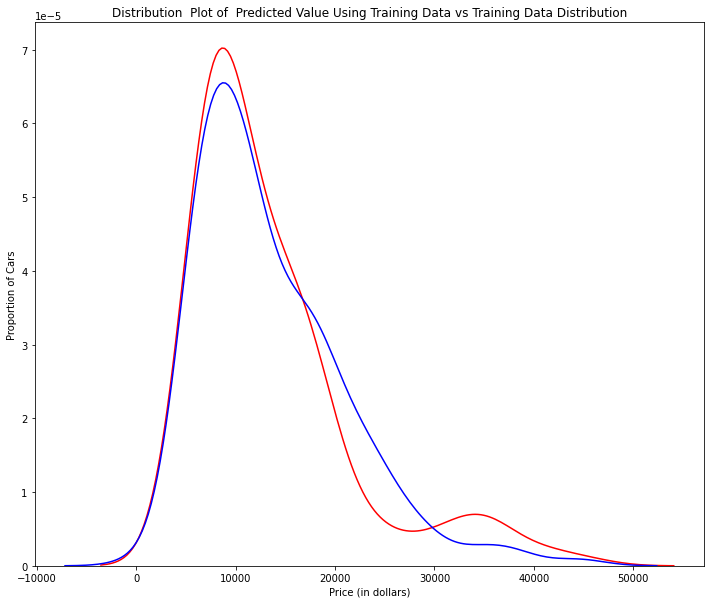

In [44]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Al parecer el modelo esta aprendiendo bien de los datos de entrenamiento.
Pero que pasaria si el modelo encuentra nuevos datos como los de prueba?
 
 Veamos a continuacion que pasa :


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


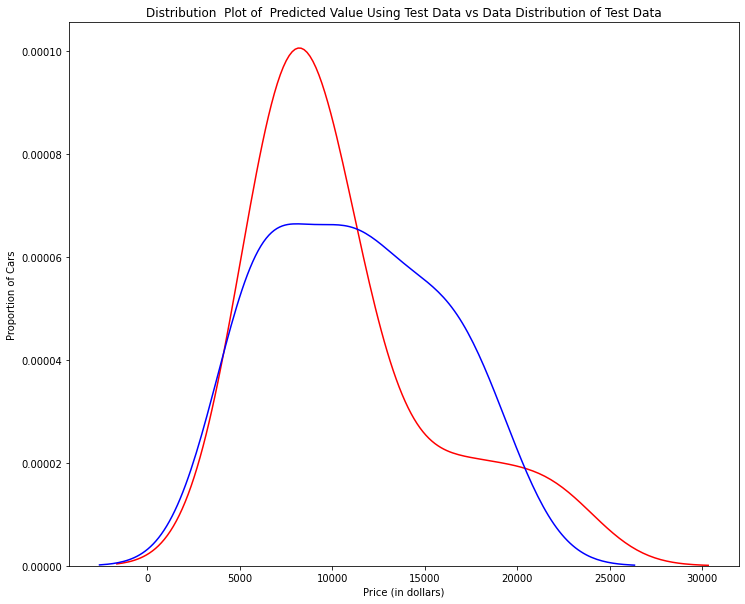

In [45]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Si comparamos ambas graficas vemos que es evidente que en la  grafica 1 los datos de entrenamiento hacer que el modelo se vean bien las curvas. 

En la grafica 2 en el rango de 500 a 15000 se ve la curva muy diferente y nada que ver en la grafica 1.

Veamos ahora con una polynomial regression para que veamos como la exactitud( accuracy) de la prediccin cae tambien con los datos de prueba.

In [46]:
from sklearn.preprocessing import PolynomialFeatures

###Overfitting
###Overfitting occurre cuando el modelo trata de modelar el ruido, pero no los datos en si. 

Ademas cuando pruebas el modelo utilizando el conjunto de prueba, el modelo no se desempeña bien ya que está modelando el ruido, y no la relacion entre las variables.

Veamos un modelo polinomial grado 5.

Hacemos ahora una particion del 45% del test size.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [48]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Lo entrenamos con train data

In [50]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

hacemos las predicciones para test

In [52]:

yhat = poly.predict(x_test_pr)
yhat[0:20]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136, 10118.29528136, 14123.67185806,  5939.12530607,
       14832.32558532,  6728.65561887,  9882.37980139, 18937.65882308,
        7905.32481316,  6577.27117953, 17326.02209912, 14123.67185806,
        7970.3637464 , 14123.67185806, 10350.91541908,  6409.57768534])

Ahora comparemos los primeros 5 valores Predecidos y los Reales:

In [53]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


Usaremos la funcion "PollyPlot" que definimos al inicio del lab para desplegar los training data, testing data, y la funcion de prediccion.

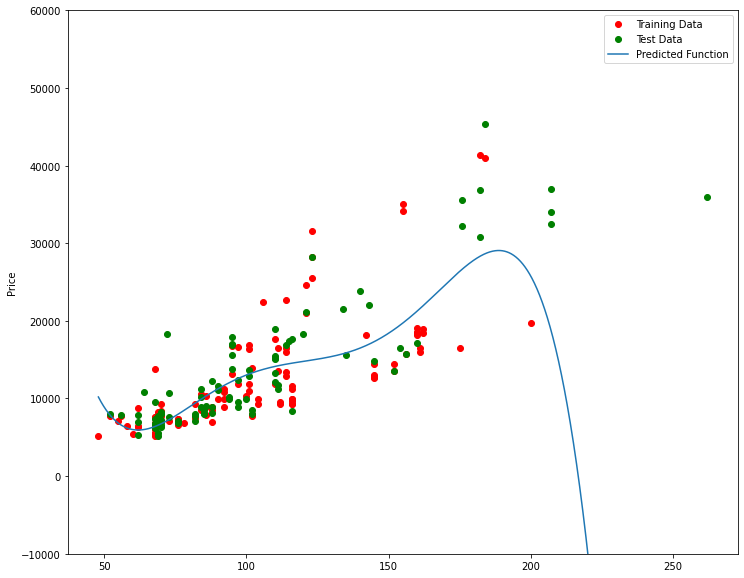

In [54]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Vemos que al principo la funcion parece seguir los datos pero cuando llegamos a 200 de horsepower , la funcion comienza a diverger de los puntos.

Veamos ahora el R^2 score para training y test:

In [55]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [56]:
poly.score(x_test_pr, y_test)

-29.87134030204415

###vemos que el  R^2 para el training data es 0.5567 mientras que el  R^2 para los datos de  test fue de  -29.87. 

### **ENTRE MAS BAJO ES R^2, ES PEOR EL MODELO**

###**UN  R^2  NEGATIVO ES SIGNO DE OVERFITTING.**

Veamos ahora como R^2 cambia en los datos de test para los diferentes grados del polinomi y dibujemos los resultados:

Text(3, 0.75, 'Maximum R^2 ')

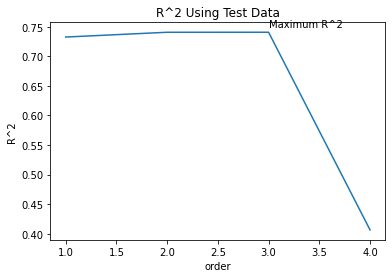

In [63]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos como R^2 gradualmente se incrementa hasta el orden 3 del polinomio.
Y entonces el R^2 dramaticamente decrece en el orden 4 del polinomio.



In [64]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

La siguiente funcion interface permite experimentar con los diferentes grados del polinomio y las cantidades de datos.


In [65]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

###QUESTIONS: We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [67]:
pr1=PolynomialFeatures(degree=2)

###QUESTIONS: Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. 

Hint: use the method "fit_transform".

In [68]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


###QUESTIONS: How many dimensions does the new feature have? 

Hint: use the attribute "shape".


In [70]:
x_train_pr1.shape #ahora hay 15 features


(110, 15)

###QUESTIONS: Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.


In [72]:
poly1=LinearRegression().fit(x_train_pr1,y_train)


###QUESTIONS: Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


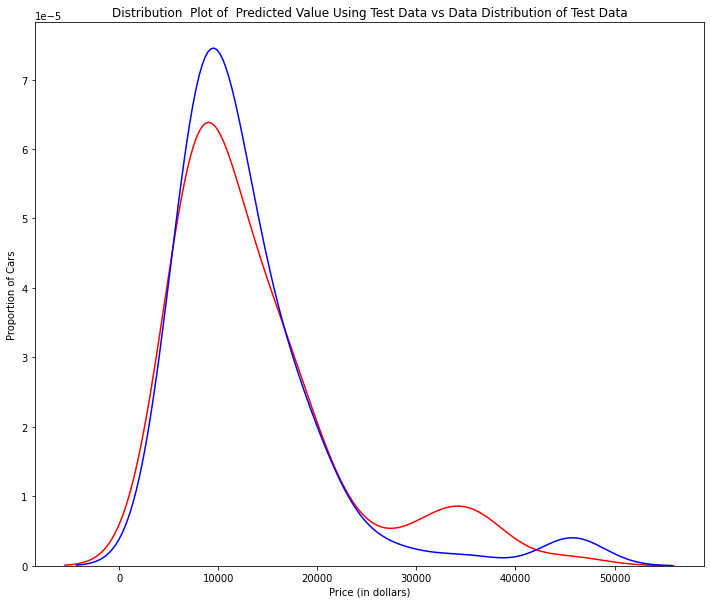

In [73]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


La curva azul (prediccion) es mas alta en autos de precio de 8,000, 10,000, 12,000, pero mas baja en precio del rango de 30,000 a 40,000, por lo que el modelo no es preciso en esos rangos.

(nota: curva roja son los datos reales de prueba)

##Parte 3: Ridge Regression

Hagamos una transformacion polinomial grado 2 a las siguientes variables:

In [74]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [75]:
from sklearn.linear_model import Ridge

In [76]:
RigeModel=Ridge(alpha=1)

Entrenemoslo con datos de training

In [77]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Hagamos las predicciones del conjunto de test

In [78]:
yhat = RigeModel.predict(x_test_pr)

In [79]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [80]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:09<00:00, 102.72it/s, Test Score=0.564, Train Score=0.859]


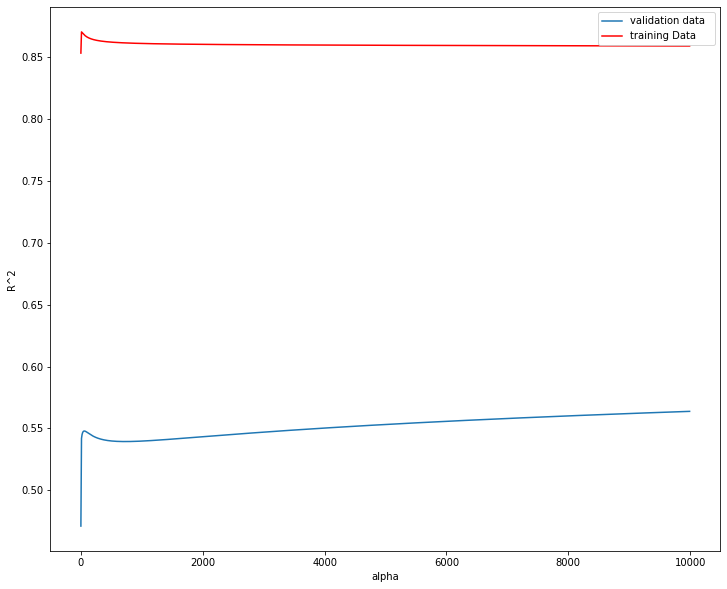

In [81]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

La linea roja de la grafica representa la R^2 de los datos de entrenamiento.
**Conforme el alpha se incrementa : el R^2 decrece**. 

Conforme **el alpha se incrementa, el modelo se desempeña peor con los datos de entrenamiento.**

La linea azul representa la R^2 con los datos de validacion.
conforme el valor de alpha se incrementa , el R^2 se incrementa y converge en un punto.


###QUESTIONS: Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

 Write your code

In [82]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

##Parte 4: Grid Search
Part 4: Grid Search
El termino alpha es un hiperparametro.

 Sklearn tiene la class GridSearchCV para realizar el proces de encontrar el mejor hiperparametro de una manera mas simple.
 


In [83]:
from sklearn.model_selection import GridSearchCV

creamos un diccionario con valores de alpha:

In [84]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creamos objeto para Ridge

In [85]:
RR=Ridge()
RR

Ridge()

Creamos objeto para GridSearchCV con RR:

In [87]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Entrenamos al Grid1:

In [88]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

En este atributo tenemos al mejor estimador con el alpha encontrado:

In [89]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

ahora sacamos su R^2:

In [90]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151